In [481]:
# Importing dependencies

In [579]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [483]:
# Remove dodgy images

In [484]:
data_dir='E:/Ali/Machine Learning/Deep Learning/Machine Learning Projects/Datasets/Deep Learning/CNN/fr'

In [485]:
os.listdir(data_dir)

['Happy', 'Sad']

In [486]:
os.listdir(os.path.join(data_dir,'Happy'))[:5]

['1 (1).jpg', '1 (10).jpg', '1 (100).jpg', '1 (101).jpg', '1 (102).jpg']

In [487]:
image_exts=['jpeg','jpg','bmp','png']

In [488]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [489]:
image_exts[0]

'jpeg'

In [490]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [491]:
# Load data

In [492]:
data=tf.keras.utils.image_dataset_from_directory('E:/Ali/Machine Learning/Deep Learning/Machine Learning Projects/Datasets/Deep Learning/CNN/fr',
                                                image_size=(48,48))

Found 1301 files belonging to 2 classes.


In [493]:
data_iterator=data.as_numpy_iterator()

In [494]:
batch=data_iterator.next()

In [495]:
batch[0]

array([[[[220.72136  , 208.97136  , 182.47136  ],
         [245.90625  , 234.90625  , 214.90625  ],
         [233.01562  , 225.9427   , 210.16145  ],
         ...,
         [163.45825  , 182.45825  , 188.45825  ],
         [152.82031  , 171.82031  , 178.66406  ],
         [199.68475  , 212.52853  , 215.14313  ]],

        [[202.57031  , 191.57031  , 163.57031  ],
         [241.13281  , 230.13281  , 208.55469  ],
         [238.84634  , 231.77344  , 214.60156  ],
         ...,
         [163.78119  , 182.78119  , 188.78119  ],
         [157.6875   , 176.6875   , 183.53125  ],
         [203.45041  , 216.29419  , 218.90878  ]],

        [[194.30208  , 183.30208  , 151.30208  ],
         [230.67969  , 220.67969  , 195.67969  ],
         [241.19792  , 234.19792  , 216.34375  ],
         ...,
         [161.6953   , 180.6953   , 186.6953   ],
         [157.28906  , 176.28906  , 183.13281  ],
         [203.39569  , 216.23947  , 218.85406  ]],

        ...,

        [[144.90105  ,  47.76823  ,  1

In [496]:
batch[1]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [497]:
batch[0][0]

array([[[220.72136  , 208.97136  , 182.47136  ],
        [245.90625  , 234.90625  , 214.90625  ],
        [233.01562  , 225.9427   , 210.16145  ],
        ...,
        [163.45825  , 182.45825  , 188.45825  ],
        [152.82031  , 171.82031  , 178.66406  ],
        [199.68475  , 212.52853  , 215.14313  ]],

       [[202.57031  , 191.57031  , 163.57031  ],
        [241.13281  , 230.13281  , 208.55469  ],
        [238.84634  , 231.77344  , 214.60156  ],
        ...,
        [163.78119  , 182.78119  , 188.78119  ],
        [157.6875   , 176.6875   , 183.53125  ],
        [203.45041  , 216.29419  , 218.90878  ]],

       [[194.30208  , 183.30208  , 151.30208  ],
        [230.67969  , 220.67969  , 195.67969  ],
        [241.19792  , 234.19792  , 216.34375  ],
        ...,
        [161.6953   , 180.6953   , 186.6953   ],
        [157.28906  , 176.28906  , 183.13281  ],
        [203.39569  , 216.23947  , 218.85406  ]],

       ...,

       [[144.90105  ,  47.76823  ,  19.057291 ],
        [14

In [498]:
batch[1][0]

0

In [499]:
len(batch)

2

In [500]:
# Images represented as numpy arrays
batch[0].shape

(32, 48, 48, 3)

In [501]:
class_names=data.class_names
class_names

['Happy', 'Sad']

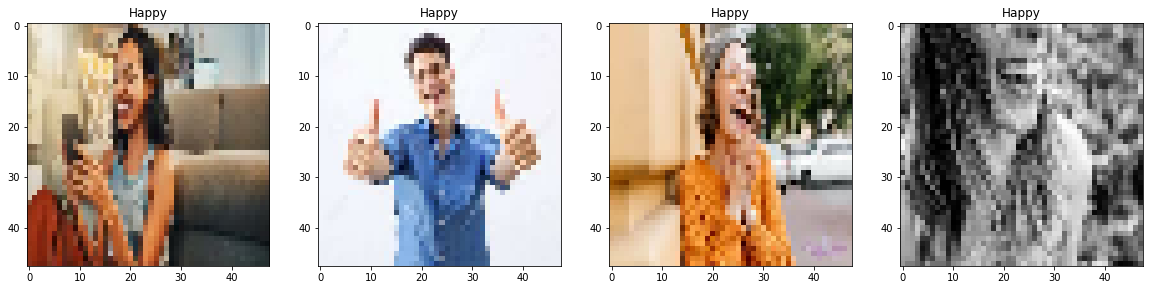

In [502]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])

In [503]:
# Preprocess data

In [504]:
# Scale data
data=data.map(lambda x,y:(x/255,y))

In [505]:
data.as_numpy_iterator().next()[0][0]

array([[[0.38055554, 0.50604576, 0.55702615],
        [0.3702206 , 0.4957108 , 0.5466912 ],
        [0.3647059 , 0.49019608, 0.5411765 ],
        ...,
        [0.36601695, 0.49150714, 0.5424875 ],
        [0.3547526 , 0.4802428 , 0.5312232 ],
        [0.3492327 , 0.4647557 , 0.51822793]],

       [[0.39270195, 0.5181921 , 0.5691725 ],
        [0.37724802, 0.5027382 , 0.5537186 ],
        [0.37002784, 0.49551806, 0.54649836],
        ...,
        [0.37254903, 0.49803922, 0.54901963],
        [0.36870787, 0.49419808, 0.5451785 ],
        [0.3612744 , 0.47679743, 0.5302696 ]],

       [[0.4024918 , 0.52798206, 0.57896245],
        [0.3882353 , 0.5137255 , 0.5647059 ],
        [0.38041386, 0.5059041 , 0.55688447],
        ...,
        [0.3797195 , 0.5052097 , 0.5561901 ],
        [0.37267157, 0.49816176, 0.5491422 ],
        [0.36621353, 0.48173657, 0.5352087 ]],

       ...,

       [[0.38827997, 0.5216133 , 0.5686721 ],
        [0.39215687, 0.5254902 , 0.57254905],
        [0.39215687, 0

In [506]:
len(data)

41

In [507]:
train_size=int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*0.1)

In [508]:
train_size

28

In [509]:
val_size

8

In [510]:
test_size

4

In [511]:
# Split data
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [512]:
len(train)

28

In [513]:
len(val)

8

In [514]:
len(test)

4

In [515]:
train=train.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [516]:
# Data augmentation
data_augmentation=Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical',input_shape=(48,48,3)),
    layers.RandomRotation(factor=(-0.2,0.3)),
    layers.RandomZoom(height_factor=(0.2,0.3),width_factor=(0.2,0.3))
])

In [517]:
# Deep model

In [518]:
# Build deep learning model

In [519]:
model=Sequential()

In [520]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(48,48,3))),
model.add(MaxPooling2D()),
model.add(Dropout(0.2)),
model.add(Conv2D(32,(3,3),1,activation='relu')),
model.add(MaxPooling2D()),
model.add(Dropout(0.2)),
model.add(Conv2D(16,(3,3),1,activation='relu')),
model.add(Flatten()),
model.add(Dropout(0.2)),
model.add(Dense(256,activation='relu')),
model.add(Dense(1,activation='sigmoid'))

In [521]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [522]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 46, 46, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 21, 21, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,369 (1.04 MB)

 Trainable params: 272,369 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [523]:
# Train

In [524]:
logdir='logs'

In [525]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [526]:
hist=model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5362 - loss: 0.6815 - val_accuracy: 0.5938 - val_loss: 0.6818
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6319 - loss: 0.6578 - val_accuracy: 0.6836 - val_loss: 0.6120
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6806 - loss: 0.5819 - val_accuracy: 0.5898 - val_loss: 0.6342
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7161 - loss: 0.5626 - val_accuracy: 0.6758 - val_loss: 0.5979
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7585 - loss: 0.4977 - val_accuracy: 0.6445 - val_loss: 0.5977
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7522 - loss: 0.5211 - val_accuracy: 0.6367 - val_loss: 0.6113
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7346 - loss: 0.5061 - val_accuracy: 0.7344 - val_loss: 0.5416
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7526 - loss: 0.5102 - val_accuracy: 0.7578 - v

In [527]:
model.evaluate(test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8958 - loss: 0.4110 


[0.43843013048171997, 0.8828125]

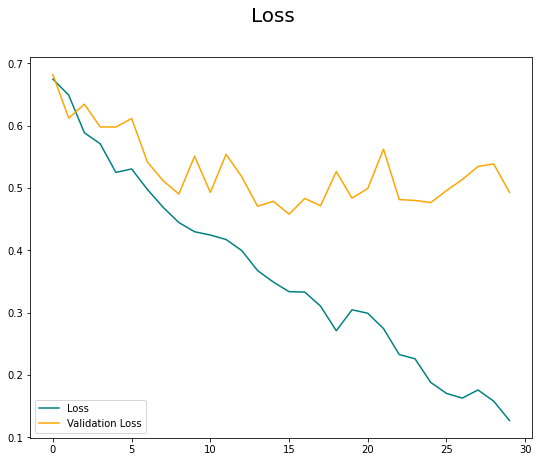

In [529]:
fig=plt.figure(figsize=(9,7))
plt.plot(hist.history['loss'],color='teal',label='Loss')
plt.plot(hist.history['val_loss'],color='orange',label='Validation Loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='lower left')
plt.show()

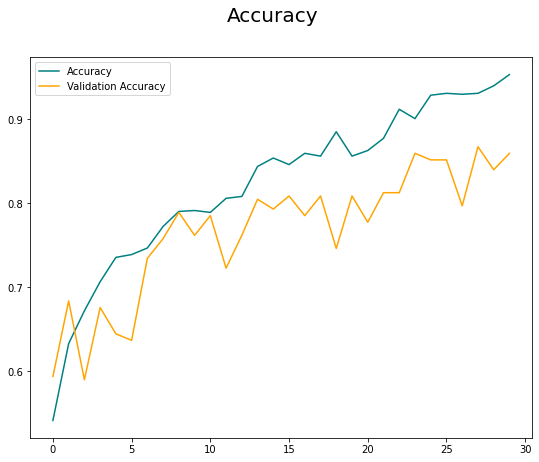

In [534]:
fig=plt.figure(figsize=(9,7))
plt.plot(hist.history['accuracy'],color='teal',label='Accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='Validation Accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

In [537]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [538]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [539]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.8620689511299133,Recall:0.8771929740905762,Accuracy:0.8828125


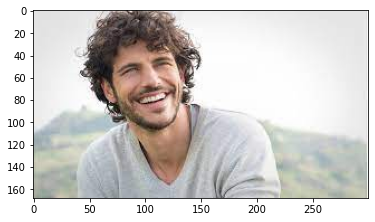

In [541]:
img=cv2.imread('E:/Ali/Machine Learning/Deep Learning/Machine Learning Projects/Datasets/Deep Learning/CNN/Happy.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

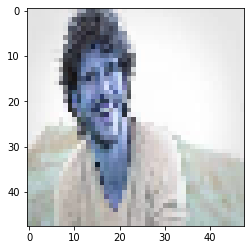

In [542]:
resize=tf.image.resize(img,(48,48))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [543]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


In [544]:
yhat

array([[0.28721833]], dtype=float32)

In [562]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


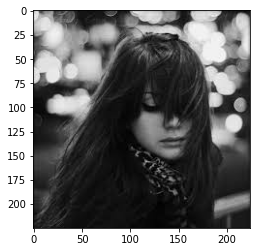

In [567]:
img2=cv2.imread('E:/Ali/Machine Learning/Deep Learning/Machine Learning Projects/Datasets/Deep Learning/CNN/Sad.jpg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

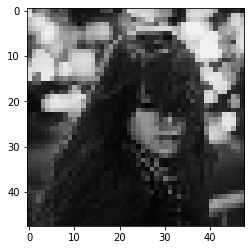

In [568]:
resize2=tf.image.resize(img2,(48,48))
plt.imshow(resize2.numpy().astype('int'))
plt.show()

In [576]:
yhat2=model.predict(np.expand_dims(resize2/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [577]:
yhat2

array([[0.99941224]], dtype=float32)

In [578]:
if yhat2>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [582]:
model.save(os.path.join('E:/Ali/Machine Learning/Deep Learning/Machine Learning Projects/Datasets/Deep Learning/CNN','happysadmodel.h5'))

In [583]:
new_model=load_model(os.path.join('E:/Ali/Machine Learning/Deep Learning/Machine Learning Projects/Datasets/Deep Learning/CNN','happysadmodel.h5'))

In [586]:
yhat_new=new_model.predict(np.expand_dims(resize2/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [587]:
if yhat_new>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is happy')

Predicted class is Sad
